In [1]:
!pip install numpy pandas scikit-fuzzy matplotlib requests

In [2]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
data = pd.read_csv('./dataset_restoran.csv')

percentage = 0.3
data[:int(len(data) * percentage)]

,ID,Nama_Restoran,Harga,Rating,Jarak (km),Waktu Tunggu (menit),Jumlah Ulasan
0,1,Restoran_1,25795,3.5,4.2,56,733
1,2,Restoran_2,10860,2.2,4.8,23,470
2,3,Restoran_3,86820,1.4,5.2,51,741
3,4,Restoran_4,64886,2.8,12.8,20,761
4,5,Restoran_5,16265,1.9,2.5,57,934
5,6,Restoran_6,92386,2.7,10.8,9,918
6,7,Restoran_7,47194,4.5,8.5,39,567
7,8,Restoran_8,97498,2.3,4.8,16,556
8,9,Restoran_9,54131,1.5,6.6,29,262
9,10,Restoran_10,70263,2.4,4.2,56,399


In [4]:
# Data Range

min_harga = data['Harga'].min()
max_harga = data['Harga'].max()
max_rate = data['Rating'].max()

print(f"Rentang Harga: {min_harga} - {max_harga}")
print(f"Rating: 0 - {max_rate}")

Rentang Harga: 10206 - 99812
Rating: 0 - 5.0


In [5]:
# Variabel Universal

harga = ctrl.Antecedent(np.arange(10000, 100001, 1000), 'harga')
rating = ctrl.Antecedent(np.arange(1, 5.1, 0.1), 'rating')
kelayakan = ctrl.Consequent(np.arange(0, 101, 1), 'kelayakan')

In [6]:
# Membership Function

#Harga
harga['murah'] = fuzz.trimf(harga.universe, [10000, 10000, 30000])
harga['sedang'] = fuzz.trimf(harga.universe, [25000, 50000, 70000])
harga['mahal'] = fuzz.trimf(harga.universe, [60000, 100000, 100000])

#Rating
rating['rendah'] = fuzz.trimf(rating.universe, [1, 1, 2.5])
rating['sedang'] = fuzz.trimf(rating.universe, [2, 3.2, 4])
rating['tinggi'] = fuzz.trimf(rating.universe, [3.5, 5, 5])

#Kelayakan
kelayakan['tidak'] = fuzz.trimf(kelayakan.universe, [0, 0, 35])
kelayakan['lumayan'] = fuzz.trimf(kelayakan.universe, [30, 50, 70])
kelayakan['direkomendasikan'] = fuzz.trimf(kelayakan.universe, [60, 100, 100])

C:\ProgramData\anaconda3\envs\ai_env\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


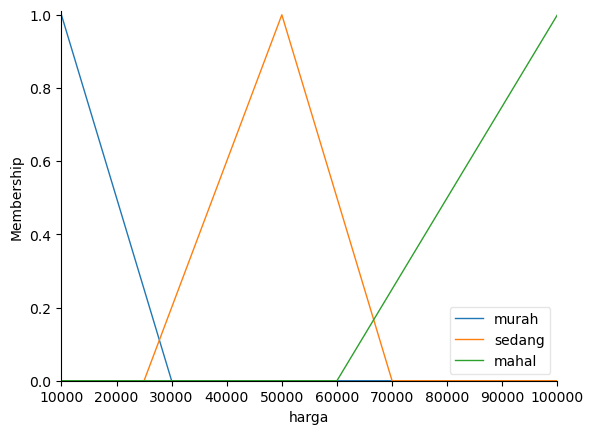

In [7]:
#Visualisasi Harga

harga.view()
plt.show()

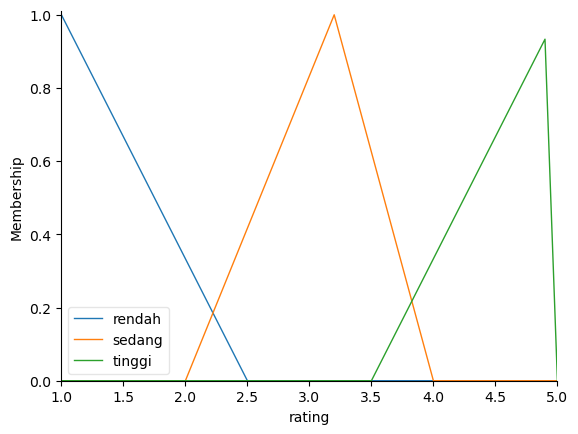

In [8]:
# Visualisasi Rating
rating.view()
plt.show()

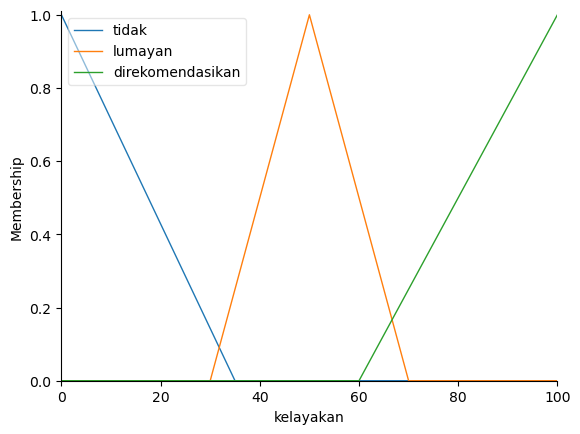

In [9]:
#Visualisasi Kelayakan
kelayakan.view()
plt.show()

In [10]:
# Rules
rule1 = ctrl.Rule(harga['murah'] & rating['tinggi'], kelayakan['direkomendasikan'])
rule2 = ctrl.Rule(harga['murah'] & rating['sedang'], kelayakan['lumayan'])
rule3 = ctrl.Rule(harga['murah'] & rating['rendah'], kelayakan['tidak'])
rule4 = ctrl.Rule(harga['sedang'] & rating['tinggi'], kelayakan['direkomendasikan'])
rule5 = ctrl.Rule(harga['sedang'] & rating['sedang'], kelayakan['lumayan'])
rule6 = ctrl.Rule(harga['sedang'] & rating['rendah'], kelayakan['tidak'])
rule7 = ctrl.Rule(harga['mahal'] & rating['tinggi'], kelayakan['lumayan'])
rule8 = ctrl.Rule(harga['mahal'] & rating['sedang'], kelayakan['lumayan'])
rule9 = ctrl.Rule(harga['mahal'] & rating['rendah'], kelayakan['tidak'])

kelayakan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
kelayakan_sim = ctrl.ControlSystemSimulation(kelayakan_ctrl)

In [11]:
def compute_kelayakan(row):
    sim = ctrl.ControlSystemSimulation(kelayakan_ctrl)
    
    harga_value = None
    rating_value = None
    
    try:
        harga_value = row['Harga']
        rating_value = row['Rating']
        
        harga_value = np.clip(harga_value, harga.universe[0], harga.universe[-1])
        rating_value = np.clip(rating_value, rating.universe[0], rating.universe[-1])
        
        sim.input['harga'] = harga_value
        sim.input['rating'] = rating_value
        
        sim.compute()
        return sim.output['kelayakan']
    
    except Exception as ex:
        print(f"Error row {row.name}: {ex}")
        return np.nan

data['Kelayakan'] = data.apply(compute_kelayakan, axis=1)

In [12]:
data.head()

,ID,Nama_Restoran,Harga,Rating,Jarak (km),Waktu Tunggu (menit),Jumlah Ulasan,Kelayakan
0,1,Restoran_1,25795,3.5,4.2,56,733,50.000000
1,2,Restoran_2,10860,2.2,4.8,23,470,32.653753
2,3,Restoran_3,86820,1.4,5.2,51,741,12.619395
3,4,Restoran_4,64886,2.8,12.8,20,761,50.000000
4,5,Restoran_5,16265,1.9,2.5,57,934,14.291667


In [13]:
def classify_kelayakan(nilai):
    if nilai < 40:
        return "Tidak"
    elif nilai < 60:
        return "Lumayan"
    else:
        return "Direkomendasikan"

# Apply the classification
data['Jenis_Kelayakan'] = data['Kelayakan'].apply(classify_kelayakan)

In [14]:
resto_layak = data.sort_values(by='Kelayakan', ascending=False)
resto_layak.to_csv('./resto_layak.csv', index=False)
resto_layak[['Nama_Restoran', 'Jarak (km)', 'Waktu Tunggu (menit)', 'Rating', 'Kelayakan', 'Jenis_Kelayakan']].head(10)


,Nama_Restoran,Jarak (km),Waktu Tunggu (menit),Rating,Kelayakan,Jenis_Kelayakan
63,Restoran_64,10.0,35,4.8,86.457516,Direkomendasikan
116,Restoran_117,4.3,57,4.6,85.918129,Direkomendasikan
6,Restoran_7,8.5,39,4.5,85.555556,Direkomendasikan
130,Restoran_131,4.1,28,4.5,85.555556,Direkomendasikan
88,Restoran_89,7.8,29,4.4,85.142857,Direkomendasikan
87,Restoran_88,14.0,53,4.6,84.952527,Direkomendasikan
51,Restoran_52,1.7,52,4.3,84.686869,Direkomendasikan
121,Restoran_122,1.1,27,4.5,84.078126,Direkomendasikan
78,Restoran_79,12.2,24,4.9,83.436658,Direkomendasikan
106,Restoran_107,4.5,23,4.0,83.111111,Direkomendasikan


In [20]:
def prioritas_rekomendasi(row):
    if row['Kelayakan'] > 70 and row['Rating'] >= 4.0 and row['Waktu Tunggu (menit)'] <= 40:
        return "Top Priority"
    elif row['Kelayakan'] > 50:
        return "Medium Priority"
    else:
        return "Low Priority"

data['Prioritas'] = data.apply(prioritas_rekomendasi, axis=1)

In [21]:
prioritas_order = {'Top Priority': 0, 'Medium Priority': 1, 'Low Priority': 2}
resto_prioritas = data.copy()
resto_prioritas['Prioritas_Order'] = resto_prioritas['Prioritas'].map(prioritas_order)
resto_prioritas = resto_prioritas.sort_values(by=['Prioritas_Order', 'Kelayakan'], ascending=[True, False])

resto_prioritas.to_csv('./resto_prioritas.csv', index=False)
resto_prioritas[['Nama_Restoran', 'Jarak (km)', 'Waktu Tunggu (menit)', 'Rating', 'Kelayakan', 'Jenis_Kelayakan', 'Prioritas']].head(10)

,Nama_Restoran,Jarak (km),Waktu Tunggu (menit),Rating,Kelayakan,Jenis_Kelayakan,Prioritas
63,Restoran_64,10.0,35,4.8,86.457516,Direkomendasikan,Top Priority
6,Restoran_7,8.5,39,4.5,85.555556,Direkomendasikan,Top Priority
130,Restoran_131,4.1,28,4.5,85.555556,Direkomendasikan,Top Priority
88,Restoran_89,7.8,29,4.4,85.142857,Direkomendasikan,Top Priority
121,Restoran_122,1.1,27,4.5,84.078126,Direkomendasikan,Top Priority
78,Restoran_79,12.2,24,4.9,83.436658,Direkomendasikan,Top Priority
106,Restoran_107,4.5,23,4.0,83.111111,Direkomendasikan,Top Priority
10,Restoran_11,9.4,25,4.6,81.915322,Direkomendasikan,Top Priority
89,Restoran_90,8.3,37,4.7,81.556459,Direkomendasikan,Top Priority
32,Restoran_33,5.2,14,5.0,80.000330,Direkomendasikan,Top Priority


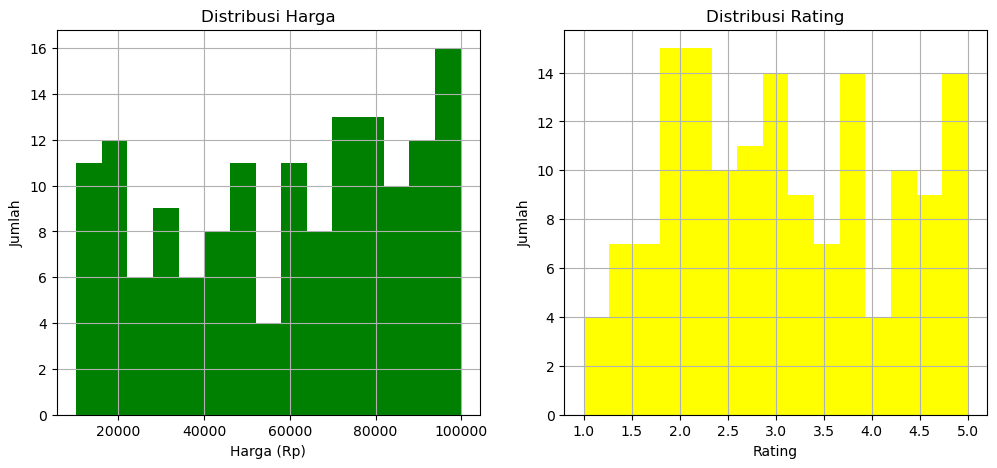

In [17]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
data['Harga'].hist(bins=15, color='green')
plt.title("Distribusi Harga")
plt.xlabel("Harga (Rp)")
plt.ylabel("Jumlah")

plt.subplot(1,2,2)
data['Rating'].hist(bins=15, color='yellow')
plt.title("Distribusi Rating")
plt.xlabel("Rating")
plt.ylabel("Jumlah")

plt.show()

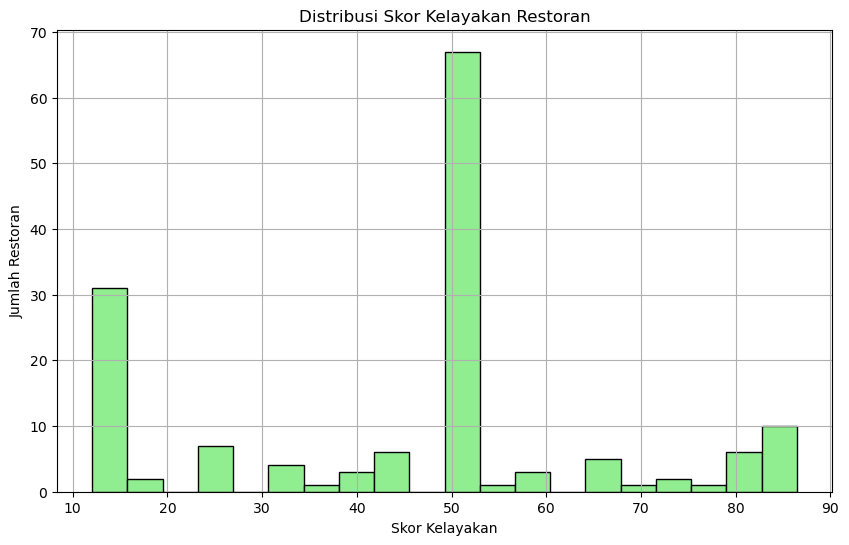

In [22]:
plt.figure(figsize=(10,6))
plt.hist(data['Kelayakan'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribusi Skor Kelayakan Restoran')
plt.xlabel('Skor Kelayakan')
plt.ylabel('Jumlah Restoran')
plt.grid(True)
plt.show()

Jumlah Restoran per Kelayakan:
Jenis_Kelayakan
Lumayan             76
Tidak               48
Direkomendasikan    26
Name: count, dtype: int64


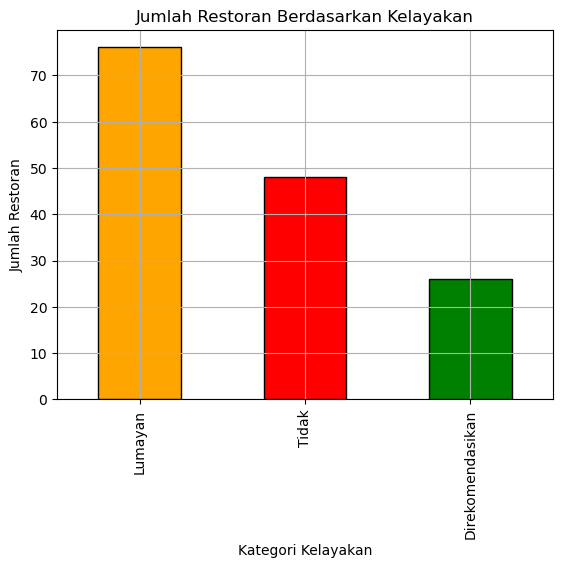

In [28]:
kelayakan_counts = data['Jenis_Kelayakan'].value_counts()
print("Jumlah Restoran per Kelayakan:")
print(kelayakan_counts)

warna_mapping = {'Tidak': 'red', 'Lumayan': 'orange', 'Direkomendasikan': 'green'}
warna = [warna_mapping[i] for i in kelayakan_counts.index]

kelayakan_counts.plot(kind='bar', color=warna, edgecolor='black')
plt.title('Jumlah Restoran Berdasarkan Kelayakan')
plt.xlabel('Kategori Kelayakan')
plt.ylabel('Jumlah Restoran')
plt.grid(True)
plt.show()

In [19]:
pip freeze requirements.txt

absl-py==2.3.1
anyio @ file:///C:/b/abs_5c8w79vk0u/croot/anyio_1745334672105/work
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/miniconda3/conda-bld/argon2-cffi-bindings_1757925007150/work
asttokens @ file:///C:/b/abs_9662ywy9fp/croot/asttokens_1743630464377/work
astunparse==1.6.3
async-lru @ file:///C:/b/abs_e0hjkvwwb5/croot/async-lru_1699554572212/work
attrs @ file:///C:/b/abs_89hmquz5ga/croot/attrs_1734533130810/work
babel @ file:///C:/b/abs_ffzt1bmjth/croot/babel_1737454394148/work
beautifulsoup4 @ file:///C:/b/abs_95vq944bnw/croot/beautifulsoup4-split_1756453107890/work
bleach @ file:///C:/b/abs_925i9psm3u/croot/bleach_1732292896852/work
Bottleneck @ file:///C:/b/abs_816hr2khp1/croot/bottleneck_1731058648110/work
Brotli @ file:///C:/b/abs_c415aux9ra/croot/brotli-split_1736182803933/work
brotlicffi @ file:///C:/b/abs_f4lixvzmxt/croot/brotlicffi_1736183286104/work
certifi @ file:///C:/b/abs_2bz30lzohz/croot/certifi_1754570